In [1]:
import warnings
warnings.filterwarnings(action='ignore')

from glob import glob

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_data(file, sheet_name):
    return pd.read_excel(file, sheet_name=sheet_name)

In [3]:
def load_all_data():
    files = glob('/Users/sabin/Documents/Project/뉴스와 소셜데이터 기반 이슈 분석 및 시각화/Trend-analysis/dataset/중대재해처벌법(40,056건)/*.xlsx')
    df = pd.DataFrame()
    for file in files:
        df = df.append(load_data(file, '블로그'))
    return df

news = load_all_data()

## 뉴스 Sheet

In [4]:
news.isna().sum()

Unnamed: 0      0
Unnamed: 1      0
Unnamed: 2     11
Unnamed: 3    228
dtype: int64

In [5]:
news.columns = news.iloc[0]
news.drop(0, inplace=True, axis=0)
news = news.dropna(axis=0, how='any')
news = news[~news['내용'].str.contains('http')]
news = news[news['내용'].str.contains('[가-힣]')]
news = news[news['내용'].str.len() < 1000]

print(news.shape)
news.head()

(3058, 4)


,작성일,작성자,제목,내용
23,2021/11/23,saramlawfirm1,[법무법인 사람] 경북동부지역 기업체 대상 중대재해처벌법 대응전략 교육,"지난 17일 한국산업안전보건공단, 경북동부경영자협회가 주최한 중대재해처벌법 이행준비..."
47,2021/09/24,saramlawfirm1,"[법무법인 사람] '중대재해처벌법과 최근 동향' 설명회, 한국승강기안전공단 개최",지난 16일 한국승강기안전공단 본부에서 개최한 중대재해처벌법 설명회에서 이기윤 법무...
67,2021/11/11,hamusa0501,중대재해처벌법 시행일 시행시기 교육 강의 자문 노무법인 노무사,안녕하세요. 노무법인 희연입니다! \n \n \n \n \n \n중대재해 처벌 등에...
102,2021/03/19,mementomori10,2021. 2. 23. 중대재해처벌법 강의 [소혜림 변호사],2021. 2. 23. 행정중심복합도시건설청 중대재해처벌법 강의 \n \n \n \...
117,2021/11/18,soju0207,"중대재해처벌법의 중대산업재해 관련 해설서 배포(고용노동부,2021.11.17.)",안녕하세요. 한국건설안전컨설턴트 임규현 대표입니다. 최근 산업안전과 관련된 제일 큰...


## TF-IDF

In [6]:
def tfdif(corpus):
    cv = CountVectorizer(ngram_range=(1, 2), max_features=1000)
    document_term_matrix = cv.fit_transform(corpus)

    tf = pd.DataFrame(document_term_matrix.toarray(), columns=cv.get_feature_names())  # TF (Term Frequency)

    D = len(tf)
    df = tf.astype(bool).sum(axis=0)
    idf = np.log((D+1) / (df+1)) + 1             # IDF (Inverse Document Frequency)

    # TF-IDF (Term Frequency-Inverse Document Frequency)
    tfidf = tf * idf                      
    tfidf = tfidf / np.linalg.norm(tfidf, axis=1, keepdims=True)
    
    return tfidf


In [7]:
tfidf_news = tfdif(news['내용'])

In [8]:
tfidf_news

,00,01,010,02,03,04,05,06,10,10명,...,확보 의무를,확보의무,확인,확인하고,환경,활동,활동을,회사,회장,후보는
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.101915,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.141597,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.087687,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3056,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [9]:
import pickle

tfidf_news.to_pickle('tfidf_news.pkl')

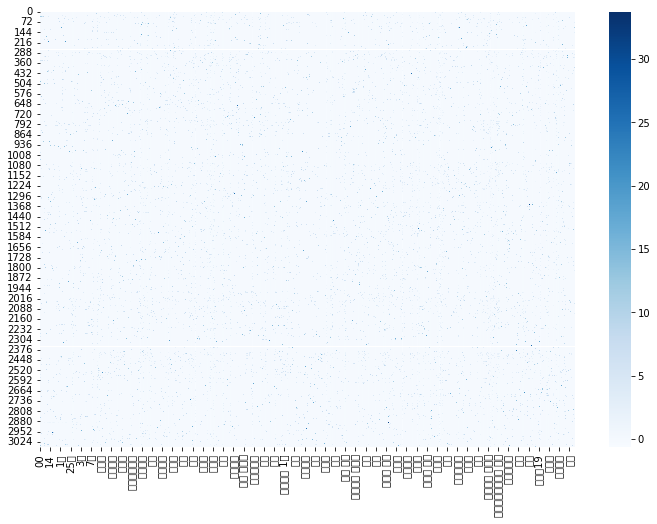

In [10]:
tfidf_news = (tfidf_news - tfidf_news.mean()) / tfidf_news.std()

# visualize

plt.figure(figsize=(12, 8))
sns.heatmap(tfidf_news, cmap='Blues')
plt.show()


# TFDIF

We couldn't figure the relationship between the words linearly

as we can see in the graph above